<a href="https://colab.research.google.com/github/savindumahasen/MRI-Brain-Tumor-Classification/blob/main/BrainTumorClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [485]:
!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install tensorflow -q
!pip install opendatasets -q

In [486]:
## import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import time
import opendatasets as od

In [487]:
## username  and password is contains  kaggle.json file please use it for download the dataset

od.download("https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset")

Skipping, found downloaded files in "./brain-tumor-mri-dataset" (use force=True to force download)


In [488]:
## define the batch size and image size
BATCH_SIZE=32
IMAGE_SIZE=(128,128)

In [489]:
## Define the train and tes set director path
train_dir="/content/brain-tumor-mri-dataset/Training"
test_dir="/content/brain-tumor-mri-dataset/Testing"

In [490]:
## split the train set into train set and  validation set

## define the batch size and image size
BATCH_SIZE=32
IMAGE_SIZE=(128,128)

## Define the train and tes set director path
train_dir="/content/brain-tumor-mri-dataset/Training"
test_dir="/content/brain-tumor-mri-dataset/Testing"

train_set=tf.keras.utils.image_dataset_from_directory(train_dir,
                                                      batch_size=BATCH_SIZE,
                                                      image_size=IMAGE_SIZE,
                                                      subset='training',
                                                      validation_split=0.1,
                                                      seed=42)
validation_set=tf.keras.utils.image_dataset_from_directory(train_dir,
                                                           batch_size=BATCH_SIZE,
                                                           image_size=IMAGE_SIZE,
                                                           subset='validation',
                                                           validation_split=0.1,
                                                           seed=42
                                                           )

Found 5712 files belonging to 4 classes.
Using 5141 files for training.
Found 5712 files belonging to 4 classes.
Using 571 files for validation.


In [491]:
## Load the test set

test_set=tf.keras.utils.image_dataset_from_directory(test_dir,
                                                           batch_size=BATCH_SIZE,
                                                           image_size=IMAGE_SIZE,
                                                           )

Found 1311 files belonging to 4 classes.


In [492]:
## Get the target values

In [493]:
class_names=train_set.class_names
class_names

['glioma', 'meningioma', 'notumor', 'pituitary']

In [494]:
## Look at the one batch

In [495]:
for image_size, label_batch in train_set.take(1):
  print(image_size.shape)
  print(label_batch.shape)

(32, 128, 128, 3)
(32,)


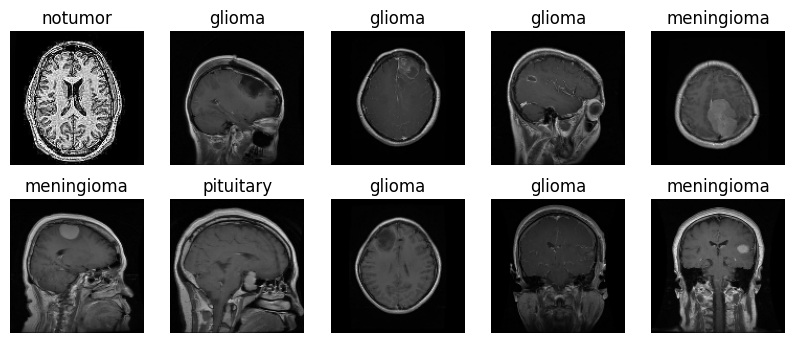

In [496]:
## Plot the data sample
plt.figure(figsize=(10,4))
for image,label in train_set.take(1):
  for i in range(10):
    ax=plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(class_names[label[i]])
    plt.axis('off')

In [497]:
for image,label in train_set.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   ...
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]]

  [[ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   ...
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]]

  [[ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   ...
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]]

  ...

  [[ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   ...
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 

In [498]:
train_data=train_set.map(lambda x,y:(x/255,y))
validation_data=validation_set.map(lambda x,y:(x/255,y))
#test_data=test_set.map(lambda x,y:(x/255,y))

In [499]:
for image,label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.      

In [500]:
## Data Augmentation

In [501]:
data_augmentation=tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal",input_shape=(128,128,3)),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2)
])

In [502]:
## Build the CNN model
# Set random seeds
import random
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

model=tf.keras.models.Sequential()
model.add(data_augmentation)
model.add(tf.keras.layers.Conv2D(32,kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D())

model.add(tf.keras.layers.Conv2D(64,kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D())

model.add(tf.keras.layers.Conv2D(128,kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))

model.add(tf.keras.layers.Dense(4,activation='softmax'))

In [503]:
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_13 (Sequential)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,325,924 (12.69 MB)

 Trainable params: 3,325,668 (12.69 MB)

 Non-trainable params: 256 (1.00 KB)

In [504]:
## Complite the model


model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [505]:
## train the CNN architecture model

In [506]:
start_time=time.time()
history=model.fit(train_data,validation_data=validation_data, epochs=20)
end_time=time.time()

Epoch 1/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 18s 81ms/step - accuracy: 0.5989 - loss: 0.9550 - val_accuracy: 0.5061 - val_loss: 1.1385
Epoch 2/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.7153 - loss: 0.6995 - val_accuracy: 0.6392 - val_loss: 0.9808
Epoch 3/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.7499 - loss: 0.6119 - val_accuracy: 0.4623 - val_loss: 1.2936
Epoch 4/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.7894 - loss: 0.5150 - val_accuracy: 0.7180 - val_loss: 0.7628
Epoch 5/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.8264 - loss: 0.4489 - val_accuracy: 0.8669 - val_loss: 0.4175
Epoch 6/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.8299 - loss: 0.4186 - val_accuracy: 0.7933 - val_loss: 0.5723
Epoch 7/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.8530 - loss: 0.3888 - val_accuracy: 0.8406 - val_loss: 0.3987
Epoch 8/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.8726 - loss: 0.3416 - val_

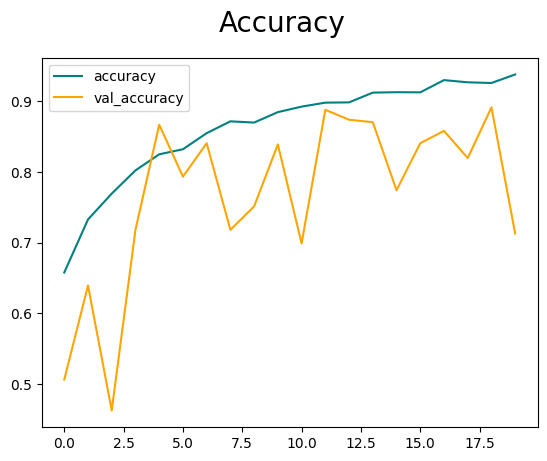

In [507]:
## plot the  accuracy  and  validation_accuracy
fig=plt.figure()
plt.plot(history.history['accuracy'], color='teal',label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
plt.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()

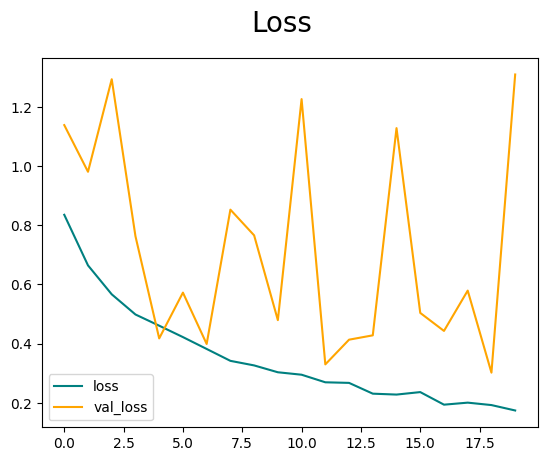

In [508]:
## plot the  loss  and  validation_loss
fig=plt.figure()
plt.plot(history.history['loss'], color='teal',label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
plt.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()

In [509]:
## Test the model using fresh test data

In [510]:

test_data=test_set.map(lambda x,y:(x/255,y))
test_data

<_MapDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

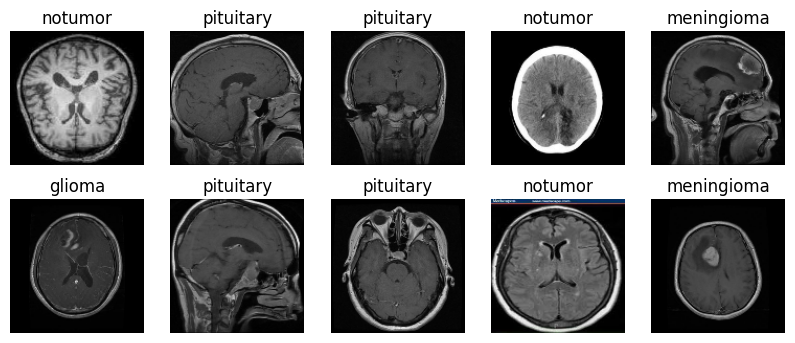

In [511]:
## Plot the data sample
plt.figure(figsize=(10,4))
for image,label in test_set.take(1):
  for i in range(10):
    ax=plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(class_names[label[i]])
    plt.axis('off')

In [512]:
def test_image():
  for image,label in test_data:
    return image
test_image=test_image()
print(test_image.shape)


def test_image_label():
  for image,label in test_data:
    return label
test_label=test_image_label()
print(test_label.shape)

(32, 128, 128, 3)
(32,)


In [513]:
precision=tf.keras.metrics.Precision()
recall=tf.keras.metrics.Recall()
accuracy=tf.keras.metrics.Accuracy()

In [514]:
model_predictions_new=model.predict(test_image)
model_predictions_new.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


(32, 4)

In [515]:
for batch in test_data.as_numpy_iterator():
    X, y = batch

    yhat = model.predict(X)  # (32, 4)
    yhat_classes = np.argmax(yhat, axis=1)  # (32,)

    precision.update_state(y, yhat_classes)
    recall.update_state(y,yhat_classes)
    accuracy.update_state(y,yhat_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━

In [516]:
precision.result(), recall.result(), accuracy.result()

(<tf.Tensor: shape=(), dtype=float32, numpy=0.8754355311393738>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.9940652847290039>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.7215865850448608>)

In [517]:
## Evaluate the performance of the model based on th test data

In [518]:
precision=tf.keras.metrics.Precision()
recall=tf.keras.metrics.Recall()
accuracy=tf.keras.metrics.Accuracy()

In [519]:
predictions=model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [520]:
predictions[1]

array([9.7786028e-07, 8.5314987e-03, 4.3269566e-01, 5.5877191e-01],
      dtype=float32)

In [521]:
## Make the prediction based on single  value

In [522]:
predictions[1]

array([9.7786028e-07, 8.5314987e-03, 4.3269566e-01, 5.5877191e-01],
      dtype=float32)

In [523]:
class_names

['glioma', 'meningioma', 'notumor', 'pituitary']

In [524]:
## get the predicted class  index
import numpy  as np
predicted_index=np.argmax(predictions[1])
predicted_index

np.int64(3)

In [525]:
class_name=['glioma','meningioma','notumor', 'pituitary']
predicted_class=class_name[predicted_index]
print("Brain Tumor : ",predicted_class)

Brain Tumor :  pituitary


In [526]:
## Evaluvate model performance using all test data

In [527]:
precision=tf.keras.metrics.Precision()
recall=tf.keras.metrics.Recall()

In [528]:
#for batch in test_set:
 # X,y=batch
 # yhat=model.predict(X)
 # precision.update_state(y,yhat)
 # recall.update_state(y,yhat)


In [529]:
## use this model based on the user data

In [530]:
!pip install opencv-python

In [531]:
import cv2

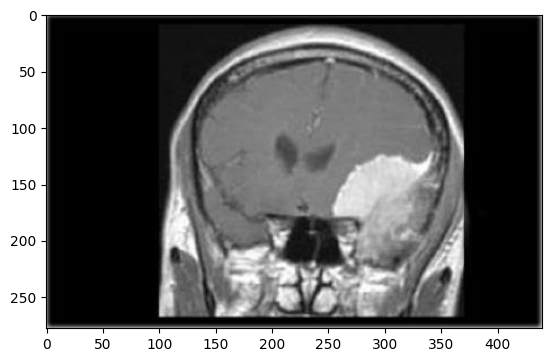

In [532]:
image=cv2.imread("/content/brain-tumor-mri-dataset/Testing/meningioma/Te-meTr_0000.jpg")
plt.imshow(image)
plt.show()

In [533]:


## data preprocessing

In [534]:

resized_image=tf.image.resize(image,IMAGE_SIZE)
scaled_image=resized_image/255

In [535]:
scaled_image

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.6433546 , 0.6433546 , 0.6433546 ],
        [0.45672297, 0.45672297, 0.45672297],
        [0.45603552, 0.45603552, 0.45603552],
        ...,
        [0.45603552, 0.45603552, 0.45603552],
        [0.45314223, 0.45314223, 0.45314223],
        [0.6385149 , 0.6385149 , 0.6385149 ]],

       [[0.44053406, 0.44053406, 0.44053406],
        [0.12732843, 0.12732843, 0.12732843],
        [0.12273284, 0.12273284, 0.12273284],
        ...,
        [0.12273284, 0.12273284, 0.12273284],
        [0.11628849, 0.11628849, 0.11628849],
        [0.44004384, 0.44004384, 0.44004384]],

       [[0.34004384, 0.34004384, 0.34004384],
        [0.01108207, 0.01108207, 0.01108207],
        [0.00165441, 0.00165441, 0.00165441],
        ...,
        [0.00165441, 0.00165441, 0.00165441],
        [0.00955308, 0.00955308, 0.00955308],
        [0.3263174 , 0.3263174 , 0.3263174 ]],

       ...,

       [[0.34347332, 0.34347332, 0.34347332],
        [0.02

In [536]:
scaled_image.shape

TensorShape([128, 128, 3])

In [537]:
## expand the diminesion of image

In [538]:
user_image=np.expand_dims(scaled_image,0).shape
user_image

(1, 128, 128, 3)

In [539]:

predictions_new=model.predict(np.expand_dims(scaled_image,0))
predictions_new

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[1.1303720e-07, 9.9998033e-01, 1.2604164e-05, 6.8926615e-06]],
      dtype=float32)

In [540]:

## get the predicted class  index
import numpy  as np
predicted_index_new=np.argmax(predictions_new)
predicted_index_new

np.int64(1)

In [541]:

class_name=['glioma','meningeoma','notumor', 'pituitary']
predicted_class_new=class_name[predicted_index_new]
print("Brain Tumor : ",predicted_class_new)

Brain Tumor :  meningeoma
